In [14]:
#Run the following code to print multiple outputs from a cell
get_ipython().ast_node_interactivity = 'all'

# Class 05 Worksheet

## Importing & Profiling the Data
Import the file, "StockData.csv", and save it in a variable called `df`. Then, do some initial data profiling of the data based on what we covered the last 2 classes. 

In [15]:
import pandas as pd
df = pd.read_csv("StockData.csv")
df

,ticker symbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,..."
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at"
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes..."
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S..."
...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis ..."
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper e...
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis faci...
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit...


What are the data types?

In [16]:
df.dtypes

ticker symbol     object
date              object
stockShares      float64
stockPrice       float64
revenue          float64
cogs             float64
quantity         float64
temperature      float64
statement         object
dtype: object

Are there missing values?

In [17]:
df.isna().sum()

ticker symbol    0
date             0
stockShares      0
stockPrice       0
revenue          0
cogs             0
quantity         0
temperature      0
statement        0
dtype: int64

What are the summary statistics for the quantitative variables? What can you say about the variables based on the summary?

In [18]:
df.describe()

,stockShares,stockPrice,revenue,cogs,quantity,temperature
count,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000,7860.000000
mean,978.156058,1312.100263,355.452999,297.794156,26.615955,-0.343343
std,98.516888,541.486311,69.957051,62.245534,19.520975,17.149851
min,809.784278,476.949801,179.316987,131.986703,4.213687,-21.840318
25%,924.292173,1003.550696,305.754637,255.680705,14.187851,-17.459061
50%,976.091229,1190.045157,346.505519,294.783712,21.066767,-11.233978
75%,1038.403035,1434.035044,396.804068,337.477349,32.286660,17.308275
max,1184.148135,12099.338748,619.630921,513.715137,198.253185,21.587124


Create histograms for "stockShares", "stockPrice", and "temperature". Try using the parameter `bins=` to set the number of bins for your histogram (e.g., `bins=30`, `bins=40`, etc.).

<AxesSubplot: ylabel='Frequency'>

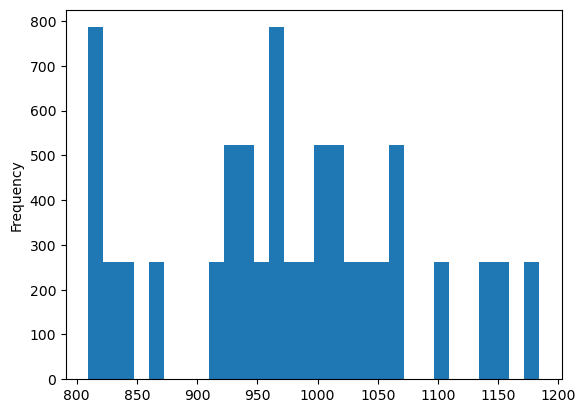

In [19]:
# Histogram for stockShares:
df["stockShares"].plot.hist(bins = 30) # use "bins" to specify the level of detail

<AxesSubplot: ylabel='Frequency'>

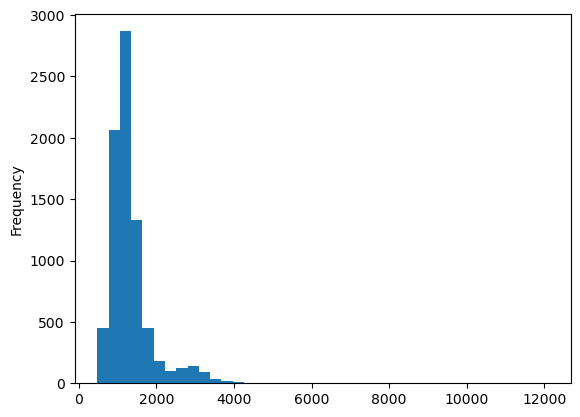

In [20]:
# Histogram for stockPrice:
df["stockPrice"].plot.hist(bins = 40)

<AxesSubplot: ylabel='Frequency'>

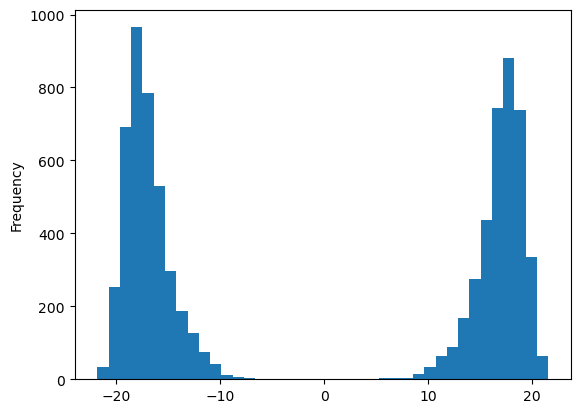

In [21]:
# Histogram for temperature:
df["temperature"].plot.hist(bins = 40)

Can you make any conclusions about these variables from the histograms?

How many categories are there for "ticket symbol" and what are the categories? Do you know notice anything strange about this variable?

In [22]:
df["ticker symbol"].value_counts().count() # counts the number of categories
df["ticker symbol"].value_counts()

# add .sort_index() to alphabetically sort the categories:
# df["ticker symbol"].value_counts().sort_index()

60

CAT     148
VZ      147
DOW     146
AMGN    144
PG      143
MMM     141
wba     140
gs      140
cvx     139
hd      138
jpm     138
ibm     138
MRK     137
AXP     136
unh     136
csco    136
DIS     135
HON     134
ko      134
WMT     134
NKE     134
MCD     133
TRV     133
aapl    133
v       133
msft    133
intc    132
JNJ     132
CRM     132
ba      131
BA      131
INTC    130
jnj     130
crm     130
MSFT    129
V       129
trv     129
AAPL    129
mcd     129
KO      128
wmt     128
hon     128
nke     128
dis     127
CSCO    126
axp     126
UNH     126
mrk     125
HD      124
IBM     124
JPM     124
CVX     123
GS      122
WBA     122
mmm     121
pg      119
amgn    118
dow     116
vz      115
cat     114
Name: ticker symbol, dtype: int64

## Feature Engineering

### Renaming a Column

That space in the column name "ticker symbol" is really going to get annoying. Let's change it:

In [23]:
df.rename(columns = {"ticker symbol" : "tickerSymbol"})

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,..."
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at"
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes..."
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S..."
...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis ..."
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper e...
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis faci...
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit...


Quick python syntax side note: the command above includes a format that we've not seen before... `{"ticker symbol" : "ticker_symbol"}`. The braces (`{}`) define a *dictionary* in python, which associates one value with another. In this case, we are associating the old column name to the new column name.

Now check the data types again:

In [24]:
df.dtypes

ticker symbol     object
date              object
stockShares      float64
stockPrice       float64
revenue          float64
cogs             float64
quantity         float64
temperature      float64
statement         object
dtype: object

The column reverted back to the original name. Why?

Re-run the `.rename()` command below, this time saving your results and check the data types to make sure the change took effect:

In [25]:
df = df.rename(columns = {"ticker symbol" : "tickerSymbol"})
df.dtypes

tickerSymbol     object
date             object
stockShares     float64
stockPrice      float64
revenue         float64
cogs            float64
quantity        float64
temperature     float64
statement        object
dtype: object

### Adding new columns

Remember how we created variables in class 01? We used an assignment statement, like the following:

In [26]:
x = 42

You do the same thing to add a new column to your DataFrame...the variable in this case being the name of the new column:

In [27]:
df["Junk"] = 28
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,Junk
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...,28
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,...",28
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",28
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes...",28
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S...",28
...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis ...",28
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper e...,28
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis faci...,28
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit...,28


### Removing columns

Let's now get rid of that "Junk" column. To do this, use the `.drop()` method:

In [28]:
df = df.drop(columns = "Junk")
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,..."
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at"
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes..."
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S..."
...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis ..."
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper e...
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis faci...
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit...


Now, you try it. Add a new column called "marketValue" that is calculated as "stockShares" * "stockPrice"

Then look at `df` to ensure the change took effect.

In [29]:
df["marketValue"] = df["stockShares"] * df["stockPrice"]
df

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...,1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,...",1.388010e+06
2,aapl,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes...",9.083493e+05
4,aapl,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S...",8.707004e+05
...,...,...,...,...,...,...,...,...,...,...
7855,wmt,2020-10-06,833.979461,1285.952063,311.565775,290.771584,21.007769,18.317446,"Id, vestibulum sed laoreet augue turpis felis ...",1.072458e+06
7856,WMT,2020-10-05,833.979461,1257.930537,330.121727,315.013983,25.309684,17.749011,Mi ut mi erat eleifend tristique ullamcorper e...,1.049088e+06
7857,WMT,2020-10-07,833.979461,1408.577951,388.054447,330.666912,29.662335,16.115598,Aliquam lacus aliquam urna arcu venenatis faci...,1.174725e+06
7858,WMT,2020-10-20,833.979461,1258.867973,314.862642,300.179547,21.689385,18.683981,Condimentum pellentesque donec varius quam sit...,1.049870e+06


### Changing Data

Remember the `tickerSymbol` column has a mix of upper- and lower-case ticker symbols:

In [30]:
df["tickerSymbol"].value_counts().sort_index()

AAPL    129
AMGN    144
AXP     136
BA      131
CAT     148
CRM     132
CSCO    126
CVX     123
DIS     135
DOW     146
GS      122
HD      124
HON     134
IBM     124
INTC    130
JNJ     132
JPM     124
KO      128
MCD     133
MMM     141
MRK     137
MSFT    129
NKE     134
PG      143
TRV     133
UNH     126
V       129
VZ      147
WBA     122
WMT     134
aapl    133
amgn    118
axp     126
ba      131
cat     114
crm     130
csco    136
cvx     139
dis     127
dow     116
gs      140
hd      138
hon     128
ibm     138
intc    132
jnj     130
jpm     138
ko      134
mcd     129
mmm     121
mrk     125
msft    133
nke     128
pg      119
trv     129
unh     136
v       133
vz      115
wba     140
wmt     128
Name: tickerSymbol, dtype: int64

In python, you can change the case of a string using either `.str.upper()` or `.str.lower()`. Notice what happens when adding `.str.upper()` before the `.value_counts()` command:

In [31]:
df["tickerSymbol"].str.upper().value_counts().sort_index()

AAPL    262
AMGN    262
AXP     262
BA      262
CAT     262
CRM     262
CSCO    262
CVX     262
DIS     262
DOW     262
GS      262
HD      262
HON     262
IBM     262
INTC    262
JNJ     262
JPM     262
KO      262
MCD     262
MMM     262
MRK     262
MSFT    262
NKE     262
PG      262
TRV     262
UNH     262
V       262
VZ      262
WBA     262
WMT     262
Name: tickerSymbol, dtype: int64

Of course, that didn't change the actual values for that column:

In [34]:
df["tickerSymbol"]

0       AAPL
1       AAPL
2       AAPL
3       AAPL
4       AAPL
        ... 
7855     WMT
7856     WMT
7857     WMT
7858     WMT
7859     WMT
Name: tickerSymbol, Length: 7860, dtype: object

Using an assignment statement, change the "tickerSymbol" values to be all in upper-case and re-run the code in the previous cell to check that the changes worked:

In [33]:
df["tickerSymbol"] = df["tickerSymbol"].str.upper()

### Locating Data

What if there are only specific values we want to change?

Let's take another look at the distribution of the price data:

count     7860.000000
mean      1312.100263
std        541.486311
min        476.949801
25%       1003.550696
50%       1190.045157
75%       1434.035044
max      12099.338748
Name: stockPrice, dtype: float64

<AxesSubplot: ylabel='Frequency'>

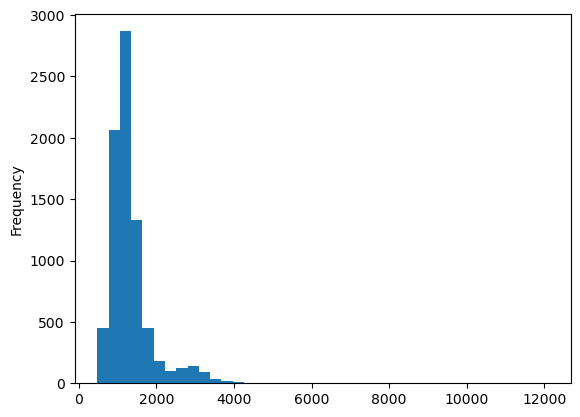

In [35]:
df["stockPrice"].describe()
df["stockPrice"].plot.hist(bins = 40)

What are the clues that we have one or more outliers?

Once we've identified a value (such as a potential outlier) to change, how do we change it?

First, lets locate the row(s) with outliers based on some logical condition. We do this with `.loc[]` ... notice the `[]` instead of `()`. 

In [36]:
# Locating rows based on logical conditions:
df.loc[df["tickerSymbol"] == "AAPL"]

# Locating rows and column:
df.loc[df["tickerSymbol"] == "AAPL", "revenue"]

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...,1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,...",1.388010e+06
2,AAPL,2020-03-26,866.883293,966.541988,290.358237,346.965304,37.337391,-18.727952,"Ligula quisque erat, nulla in. Platea, aenean at",8.378791e+05
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes...",9.083493e+05
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S...",8.707004e+05
...,...,...,...,...,...,...,...,...,...,...
257,AAPL,2020-07-06,866.883293,1105.874354,334.707321,349.519148,33.822119,17.721060,"Elit lacus ac, facilisi sapien massa dictum in...",9.586640e+05
258,AAPL,2020-11-02,866.883293,1486.758422,345.893151,268.583625,16.020092,-17.459382,"A sollicitudin, luctus congue in dui felis. Ac...",1.288846e+06
259,AAPL,2020-10-30,866.883293,1305.578564,360.275193,318.642085,26.250607,17.106928,"Tellus, faucibus tortor feugiat magna porttito...",1.131784e+06
260,AAPL,2020-08-07,866.883293,1236.435485,324.704306,303.197308,22.578481,-17.879048,Amet neque ut efficitur arcu tempor purus susp...,1.071845e+06


0      295.482953
1      332.422321
2      290.358237
3      295.507002
4      263.669375
          ...    
257    334.707321
258    345.893151
259    360.275193
260    324.704306
261    283.793792
Name: revenue, Length: 262, dtype: float64

The general structure of the `.loc[]` command is:
```
dataFrame.loc[rowCriteria, columnCriteria]
```

Now, you try...locate any row with a "stockPrice" greater than 10000. For now, include all columns:

In [37]:
df.loc[df["stockPrice"] > 10000]

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
3446,IBM,2020-04-01,934.385355,12099.338748,418.937115,370.897122,42.391047,15.420366,"Ante accumsan suspendisse augue. Neque, urna v...",1.130544e+07


Copy the command above and re-run it, selecting only the "stockPrice" column:

In [38]:
df.loc[df["stockPrice"] > 10000, "stockPrice"]

3446    12099.338748
Name: stockPrice, dtype: float64

Now that we have located the actual outlier value, we can change it with an assignment statement. Run the code below to change it to 10001:

In [39]:
df.loc[df["stockPrice"] > 10000, "stockPrice"] = 10001
df.loc[df["stockPrice"] > 10000, "stockPrice"]

3446    10001.0
Name: stockPrice, dtype: float64

Of course, we don't want to make the outlier value even worse. Since it's likely a value greater than 10000 is an error, let's change it to `NaN` so that it doesn't impact our analysis. We can do this with the `.NaN` function from the `numpy` module. 

Import `numpy` and change the outlier value to `NaN` as follows:

In [40]:
import numpy as np
df.loc[df["stockPrice"] > 10000, "stockPrice"] = np.NaN

Notice there is now a missing value for "stockPrice":

In [41]:
df.isna().sum()

tickerSymbol    0
date            0
stockShares     0
stockPrice      1
revenue         0
cogs            0
quantity        0
temperature     0
statement       0
marketValue     0
dtype: int64

Run the following code to see the impact this has on our summary stats and histogram:

count    7859.000000
mean     1310.727666
std       527.668874
min       476.949801
25%      1003.535640
50%      1189.870025
75%      1433.993986
max      4526.030051
Name: stockPrice, dtype: float64

<AxesSubplot: ylabel='Frequency'>

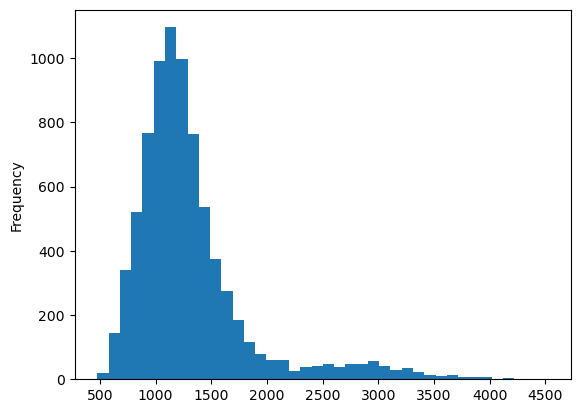

In [42]:
df["stockPrice"].describe()
df["stockPrice"].plot.hist(bins = 40)

We're not done yet. Remember that python is sequential and we created the "marketValue" column *before* changing the outlier value. Here, we can see that the "marketValue" didn't change for this row:

In [43]:
# I'm using df.index to refer to the specific row number from the DataFrame:
df.loc[df.index == 3446]

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
3446,IBM,2020-04-01,934.385355,NaN,418.937115,370.897122,42.391047,15.420366,"Ante accumsan suspendisse augue. Neque, urna v...",1.130544e+07


Re-run the following code cell to re-calculate "marketValue" and notice that we now have a missing value for that column (because python can't do math with a missing value):

In [44]:
df["marketValue"] = df["stockShares"] * df["stockPrice"]
df.loc[df.index == 3446]
df.isna().sum()

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
3446,IBM,2020-04-01,934.385355,NaN,418.937115,370.897122,42.391047,15.420366,"Ante accumsan suspendisse augue. Neque, urna v...",NaN


tickerSymbol    0
date            0
stockShares     0
stockPrice      1
revenue         0
cogs            0
quantity        0
temperature     0
statement       0
marketValue     1
dtype: int64

### Using `.loc[]` with Multiple Conditions

If you have multiple logical conditions, you can still combine them with `&` (and) and `|` (or), using parentheses for each condition:

In [45]:
df.loc[(df["stockPrice"] > 1000) & (df["tickerSymbol"] == "AAPL")]

,tickerSymbol,date,stockShares,stockPrice,revenue,cogs,quantity,temperature,statement,marketValue
0,AAPL,2020-01-22,866.883293,1206.332454,295.482953,282.851724,19.042495,18.501153,Sit conubia diam vivamus a arcu dapibus in at ...,1.045749e+06
1,AAPL,2020-03-13,866.883293,1601.149567,332.422321,239.641384,12.749161,-17.850676,"Metus bibendum mus nostra sodales consectetur,...",1.388010e+06
3,AAPL,2020-03-30,866.883293,1047.833463,295.507002,325.697458,29.899850,-19.209063,"Dictumst ultrices penatibus, viverra pellentes...",9.083493e+05
4,AAPL,2020-03-27,866.883293,1004.403268,263.669375,303.239492,20.762000,-19.731995,"Dis, accumsan senectus nisl eu at hendrerit. S...",8.707004e+05
5,AAPL,2020-03-31,866.883293,1207.620115,323.513450,309.315601,23.786200,-18.169980,Egestas malesuada ante vitae. Viverra aenean v...,1.046866e+06
...,...,...,...,...,...,...,...,...,...,...
257,AAPL,2020-07-06,866.883293,1105.874354,334.707321,349.519148,33.822119,17.721060,"Elit lacus ac, facilisi sapien massa dictum in...",9.586640e+05
258,AAPL,2020-11-02,866.883293,1486.758422,345.893151,268.583625,16.020092,-17.459382,"A sollicitudin, luctus congue in dui felis. Ac...",1.288846e+06
259,AAPL,2020-10-30,866.883293,1305.578564,360.275193,318.642085,26.250607,17.106928,"Tellus, faucibus tortor feugiat magna porttito...",1.131784e+06
260,AAPL,2020-08-07,866.883293,1236.435485,324.704306,303.197308,22.578481,-17.879048,Amet neque ut efficitur arcu tempor purus susp...,1.071845e+06


### Why use `.loc[]` instead of `.query()`?

The primary reason is that you can't change a value with `.query()`...you can only filter using that method. To change the values, you need to use `.loc[]`.

Can you use `.loc[]` instead of `.query()` if you're just filtering your data? Yes, but some programmers prefer `.query()` to filter because you don't have to keep re-typing the name of the DataFrame when referring to column names. This is why we cover it.

### Transforming Features

Plot temperature (x-axis) vs. revenue (y-axis):

<AxesSubplot: xlabel='temperature', ylabel='revenue'>

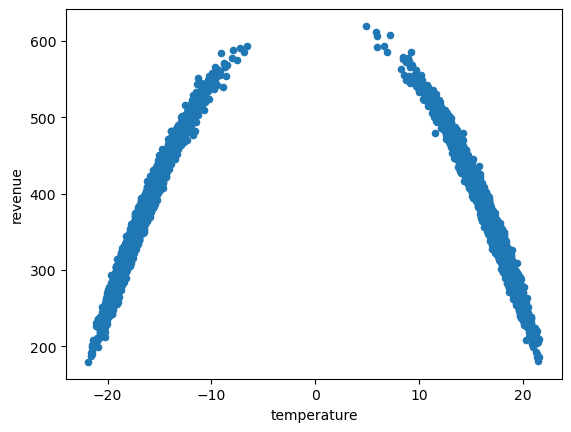

In [46]:
df.plot.scatter(x = "temperature", y = "revenue")

Now, create a new column called "temperature2" which squares the temperature. Then, re-run the scatterplot using the new column:

<AxesSubplot: xlabel='temperature2', ylabel='revenue'>

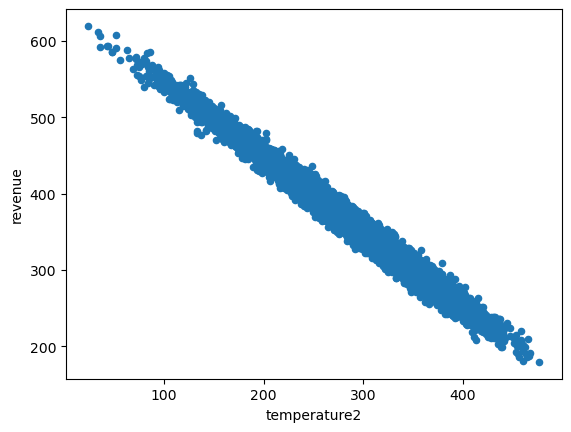

In [47]:
df["temperature2"] = df["temperature"] * df["temperature"]
df.plot.scatter(x = "temperature2", y = "revenue")

***Squaring the variable is a good transformation technique when the original data shows a U-shaped curve.***

Now plot quantity (x-axis) vs. cogs (y-axis):

<AxesSubplot: xlabel='quantity', ylabel='cogs'>

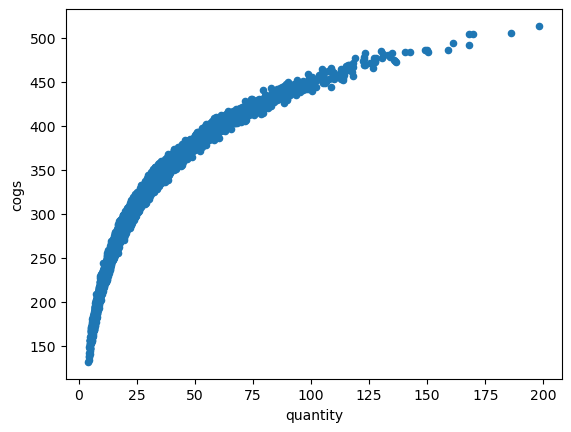

In [48]:
df.plot.scatter(x = "quantity", y = "cogs")

Create a new column called "quantityLog" that logs the data in that column. You can use the `log()` function from `numpy` (which we've already imported as `np`). Then, re-run the scatterplot with the new column:

<AxesSubplot: xlabel='quantityLog', ylabel='cogs'>

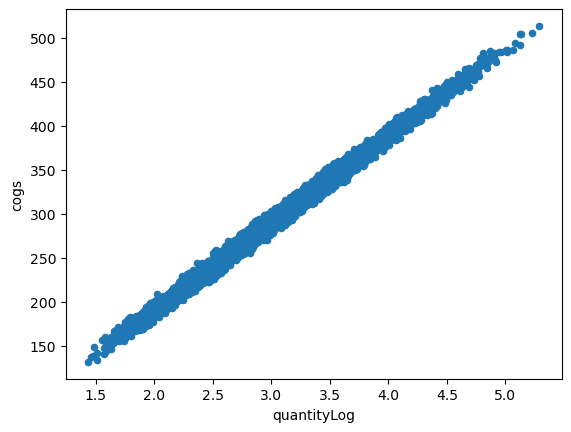

In [49]:
df["quantityLog"] = np.log(df["quantity"])
df.plot.scatter(x = "quantityLog", y = "cogs")

***Logging the variable is a good transformation technique when the original data shows a logarithmic curve (similar to half the U-shaped curve, although continuously increasing or decreasing).***

### Interaction Features

Transformations can include more than one variable. Let's look at the relationship of both revenue and cogs to market value.

First, plot revenue (x-axis) vs. marketValue (y-axis):

<AxesSubplot: xlabel='revenue', ylabel='marketValue'>

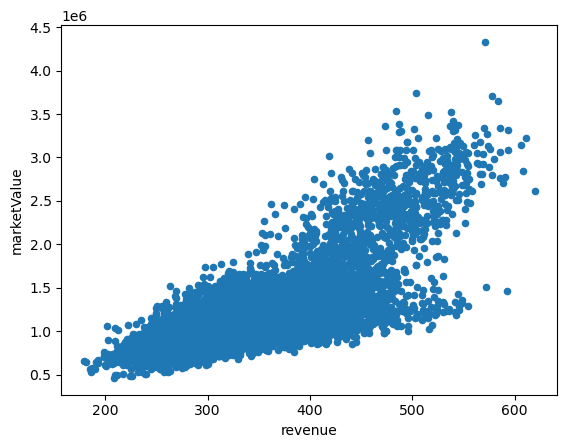

In [50]:
df.plot.scatter(x = "revenue", y = "marketValue")

Now, plot cogs (x-axis) vs. marketValue (y-axis):

<AxesSubplot: xlabel='cogs', ylabel='marketValue'>

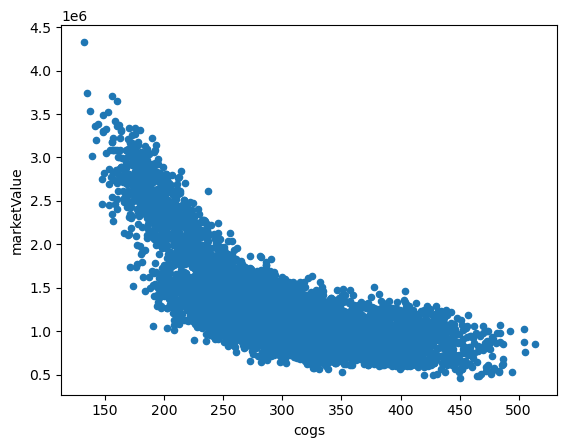

In [51]:
df.plot.scatter(x = "cogs", y = "marketValue")

Now, let's take a look at how the ratio of revenue to expenses impacts market value. First, create a new column called "ratio" which is calculated as revenue divided by cogs. Then create a scatterplot of ratio (x-axis) to marketValue (y-axis):

<AxesSubplot: xlabel='ratio', ylabel='marketValue'>

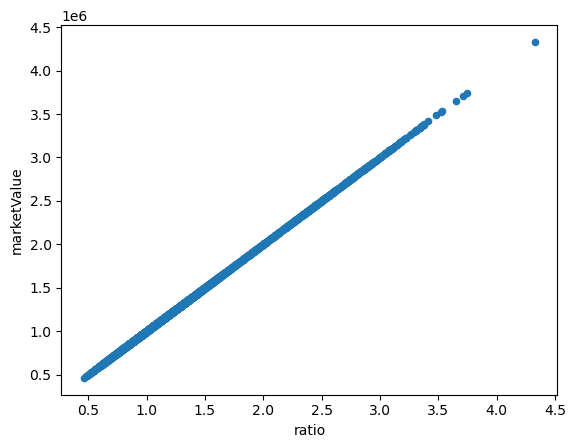

In [52]:
df["ratio"] = df["revenue"] / df["cogs"]
df.plot.scatter(x = "ratio", y = "marketValue")

***Interacting 2 variables (e.g., multiplying them together or dividing them) will often create a stronger model feature than keeping the variables separate.***

### Transforming Unstructured Data into a Feature

Unstructured data like text, image, audio, video, etc. require processing before we can use it in a model. 

Add a column "statementLength" that is the length of the text in the statement. You can get the length of a string by adding `.str.len()` to the variable as follows:

In [53]:
df["statementLength"] = df["statement"].str.len()
df["statementLength"].describe()

count    7860.000000
mean       74.080662
std        27.518035
min        27.000000
25%        57.000000
50%        68.000000
75%        81.000000
max       255.000000
Name: statementLength, dtype: float64

Now, plot statementLength (x-axis) vs. marketValue (y-axis):

<AxesSubplot: xlabel='statementLength', ylabel='marketValue'>

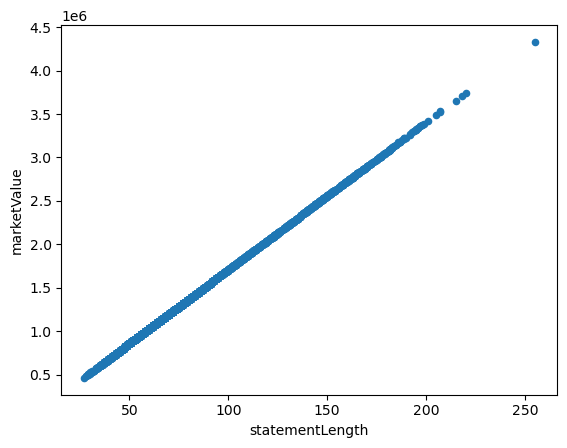

In [54]:
df.plot.scatter(x = "statementLength", y = "marketValue")